In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Importing the Dataset**

In [68]:
data = pd.read_csv("dataset/dataset.csv")

In [69]:
display(data)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [71]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#Replace "?" with NaN
data = data.replace("?", np.nan)

# Convert columns to numeric, where possible
data = data.apply(pd.to_numeric, errors='coerce')

# Determine the number of null values in each column
null_counts = data.isnull().sum()
print(null_counts)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [73]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [74]:
print("\n0 means not cancer affected and 1 means cancer affected cell")
# Count the occurrences of each value in the 'Biopsy' column
data['Biopsy'].value_counts()



0 means not cancer affected and 1 means cancer affected cell


Biopsy
0    803
1     55
Name: count, dtype: int64

In [75]:
# various number of sexual partners in the given dataset
data['Number of sexual partners'].value_counts()

Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64

In [76]:
 data.shape

(858, 36)

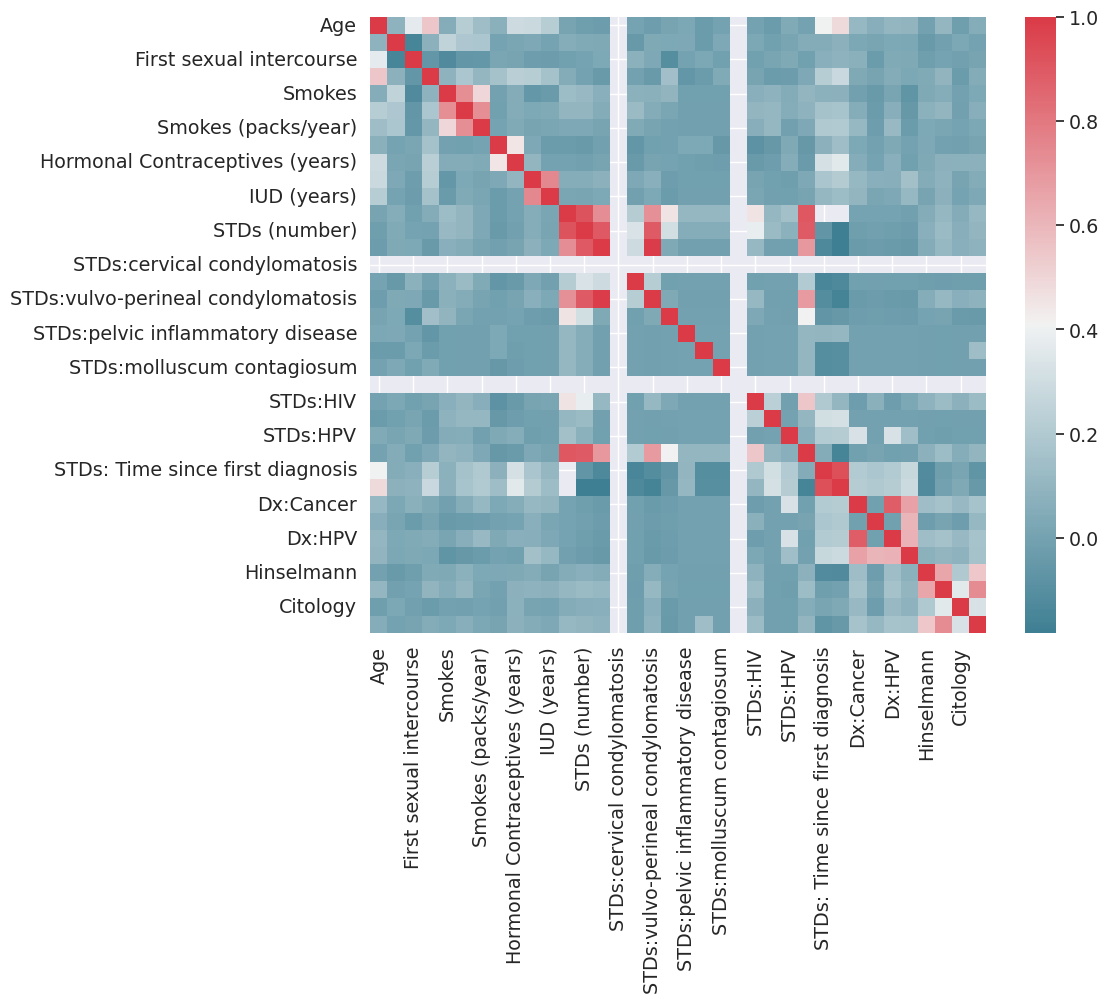

In [77]:
# Create a figure and axis
f, ax = plt.subplots(figsize=(10, 8))

# Compute the correlation matrix
corr = data.corr()

# Plot the heatmap with the updated mask type
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Show the plot
plt.show()

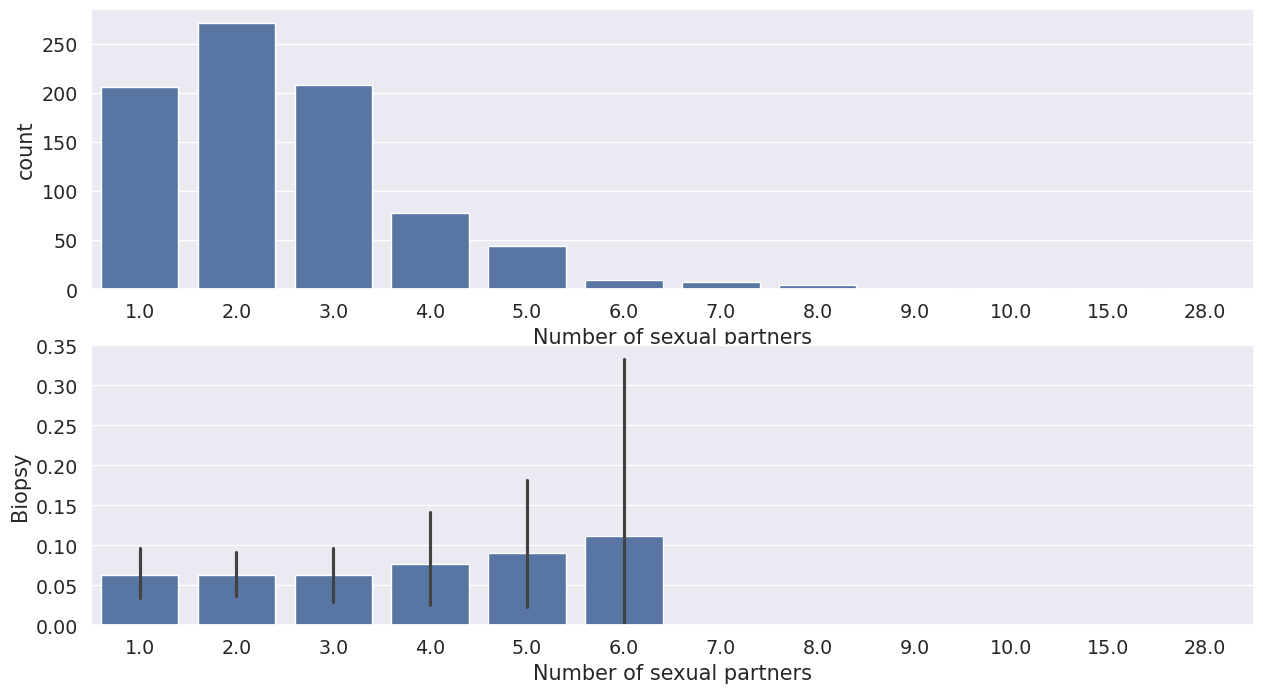

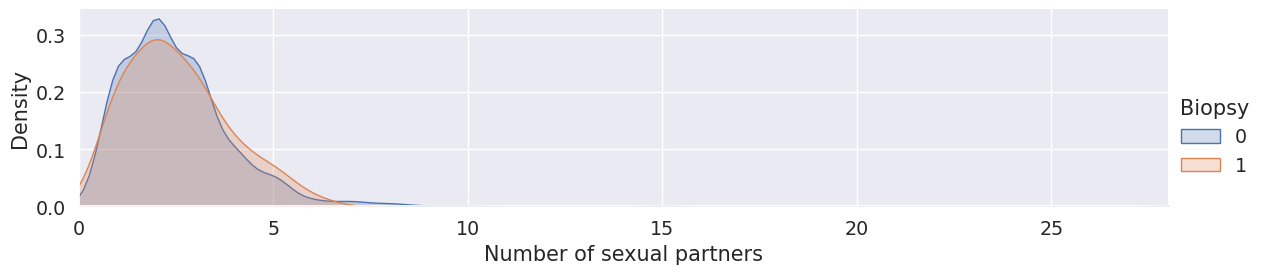

In [78]:
# Biopsy vs no. of sexual partners

# Categorical to categorical plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
sns.countplot(x='Number of sexual partners', data=data, ax=ax1)
sns.barplot(x='Number of sexual partners', y='Biopsy', data=data, ax=ax2)

# Continuous to categorical plot
facet = sns.FacetGrid(data, hue='Biopsy', aspect=4)
facet.map(sns.kdeplot, 'Number of sexual partners', fill=True)  # Updated fill=True
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

# Show the plots
# plt.show()

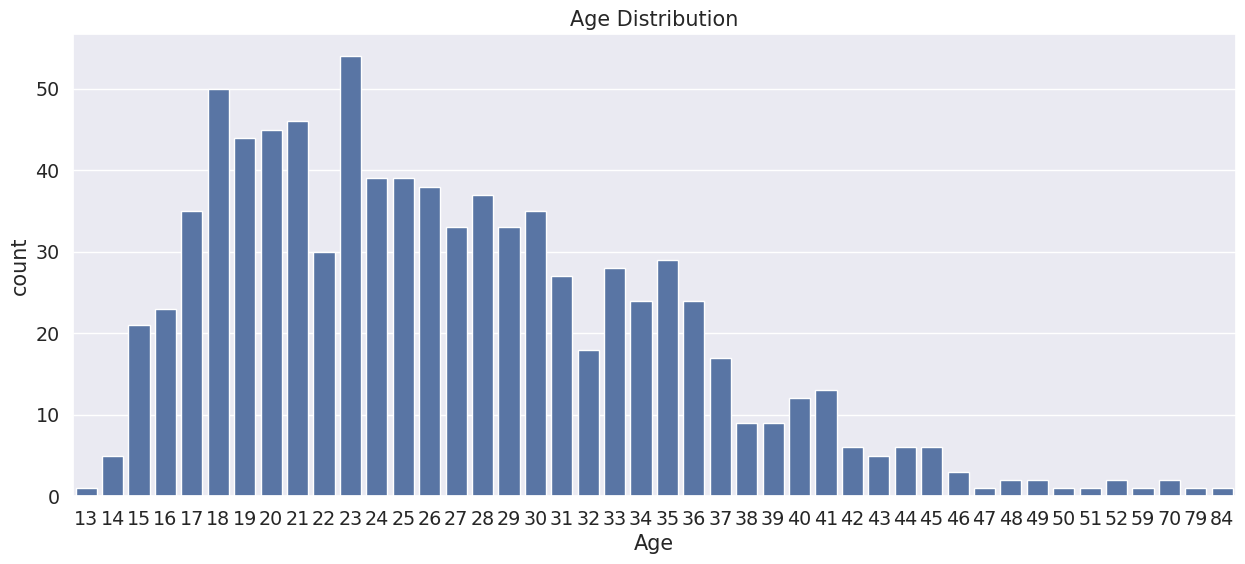

In [79]:
# Plotting the count of different ages
# Age vs. Count (Age Distribution)
plt.figure(figsize=(15, 6))
sns.countplot(x='Age', data=data)
plt.title('Age Distribution')
plt.show()

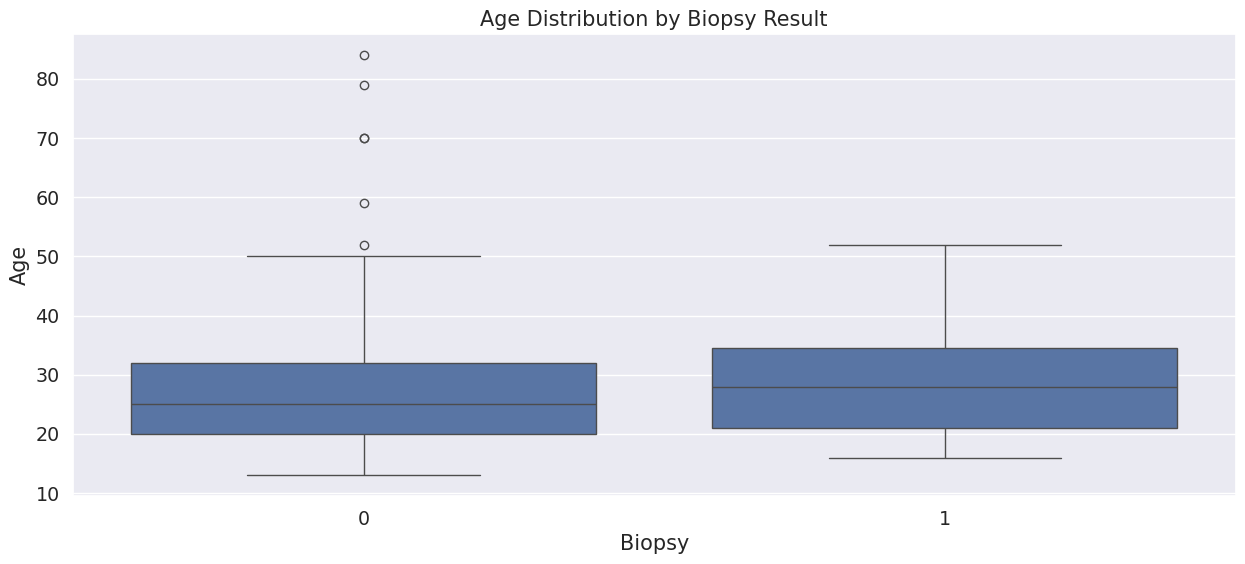

In [80]:
# Continuous to categorical plot
# Biopsy vs. Age

plt.figure(figsize=(15, 6))
sns.boxplot(x='Biopsy', y='Age', data=data)
plt.title('Age Distribution by Biopsy Result')
plt.show()

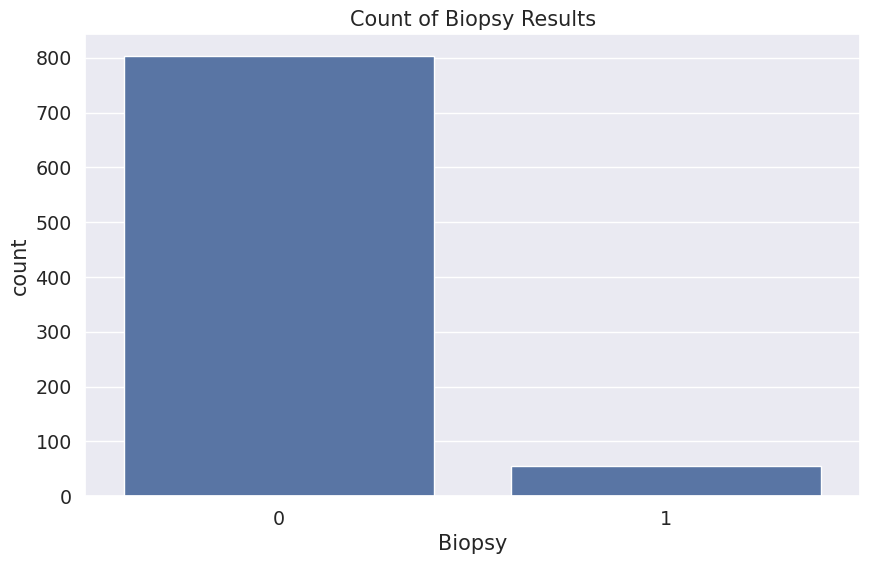

In [81]:
# Plotting the count of biopsy results
# Count vs. Biopsy

plt.figure(figsize=(10, 6))
sns.countplot(x='Biopsy', data=data)
plt.title('Count of Biopsy Results')
plt.show()

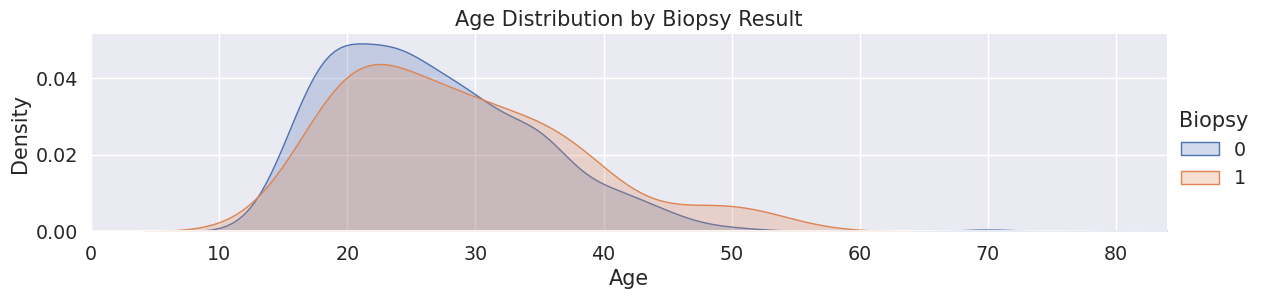

In [82]:
# Continuous to categorical plot using KDE
# Age vs. Biopsy (Distribution of Age within Each Biopsy Category)

facet = sns.FacetGrid(data, hue='Biopsy', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)  # Using fill=True instead of shade=True
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.title('Age Distribution by Biopsy Result')
plt.show()

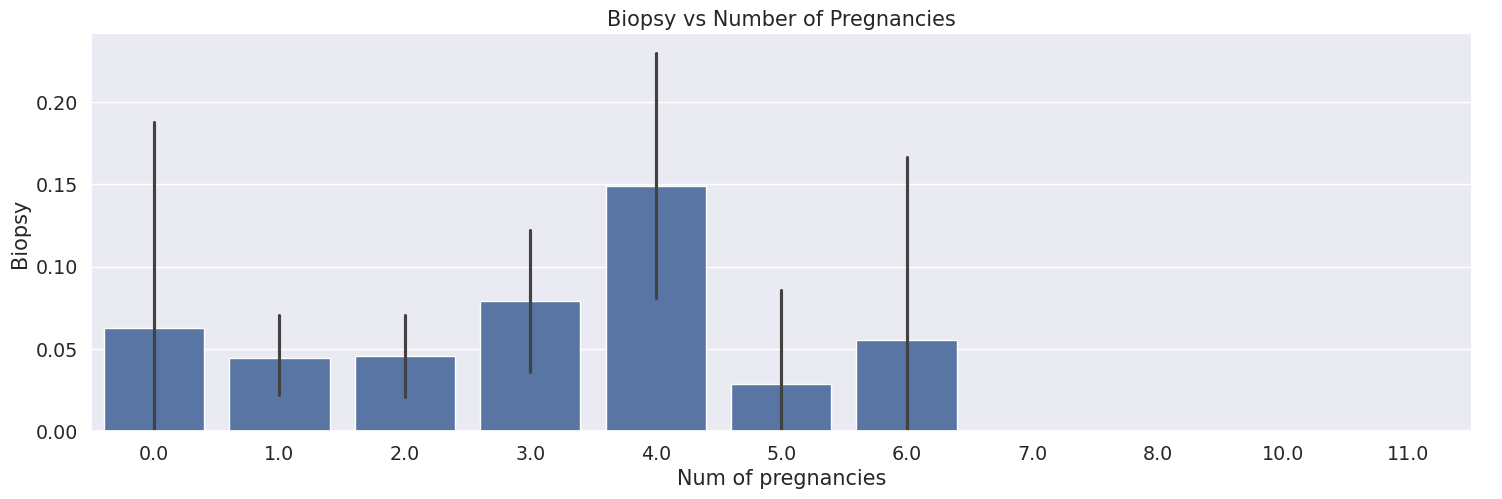

In [83]:
# Biopsy vs Number of Pregnancies
sns.catplot(x='Num of pregnancies', y='Biopsy', data=data, kind='bar', height=5, aspect=3)

# Show the plot
plt.title('Biopsy vs Number of Pregnancies')
plt.show()

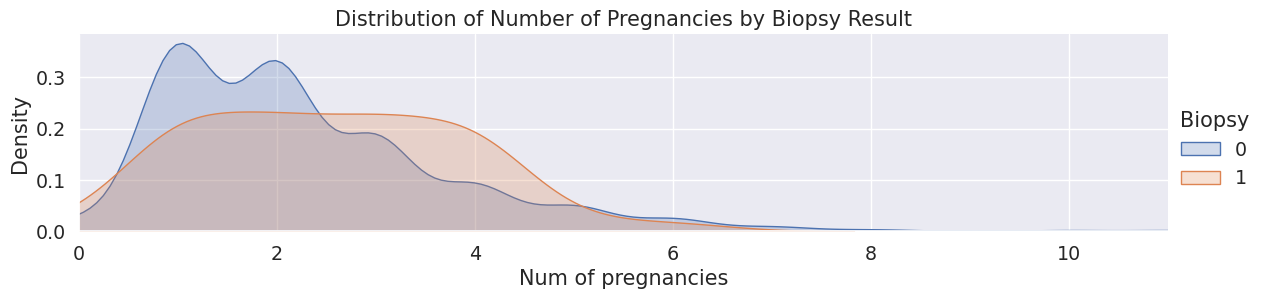

In [84]:
# Continuous to categorical: Num of pregnancies vs Biopsy
facet = sns.FacetGrid(data, hue='Biopsy', aspect=4)
facet.map(sns.kdeplot, 'Num of pregnancies', fill=True)  # Updated fill=True instead of shade=True
facet.set(xlim=(0, data['Num of pregnancies'].max()))
facet.add_legend()

# Show the plot
plt.title('Distribution of Number of Pregnancies by Biopsy Result')
plt.show()

<Axes: xlabel='Citology', ylabel='Biopsy'>

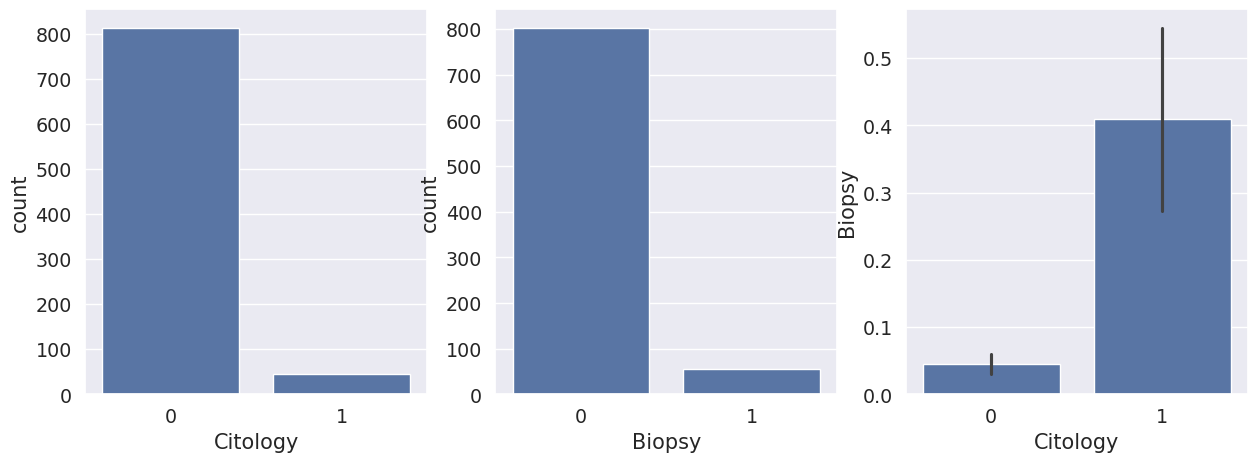

In [85]:
# biopsy vs cytology
# Check column names

# print(data.columns)

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Citology', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Citology', y='Biopsy', data=data, ax=axis3)

<Axes: xlabel='Schiller', ylabel='Biopsy'>

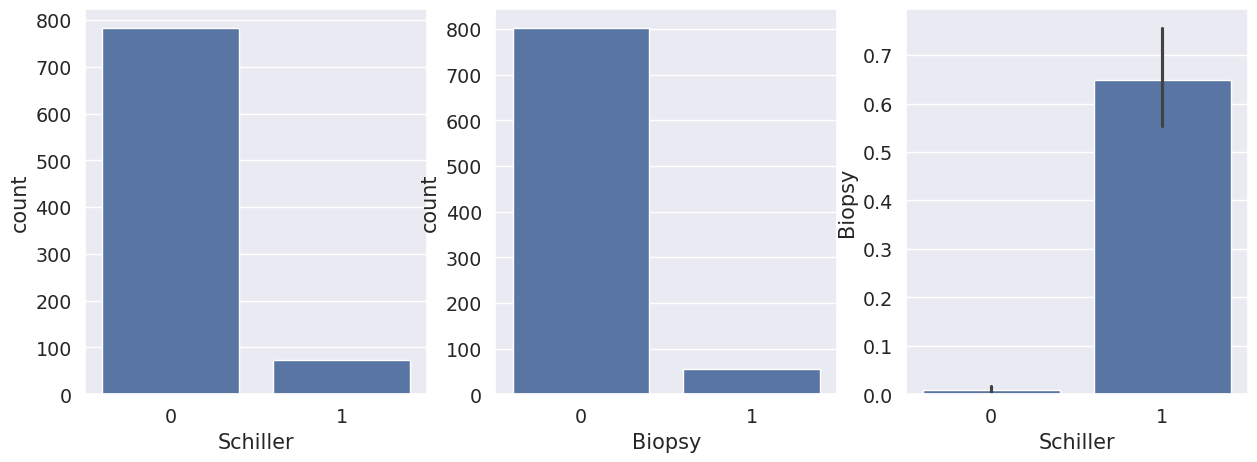

In [86]:
# Biopsy vs schiller

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Schiller', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Schiller', y='Biopsy', data=data, ax=axis3)

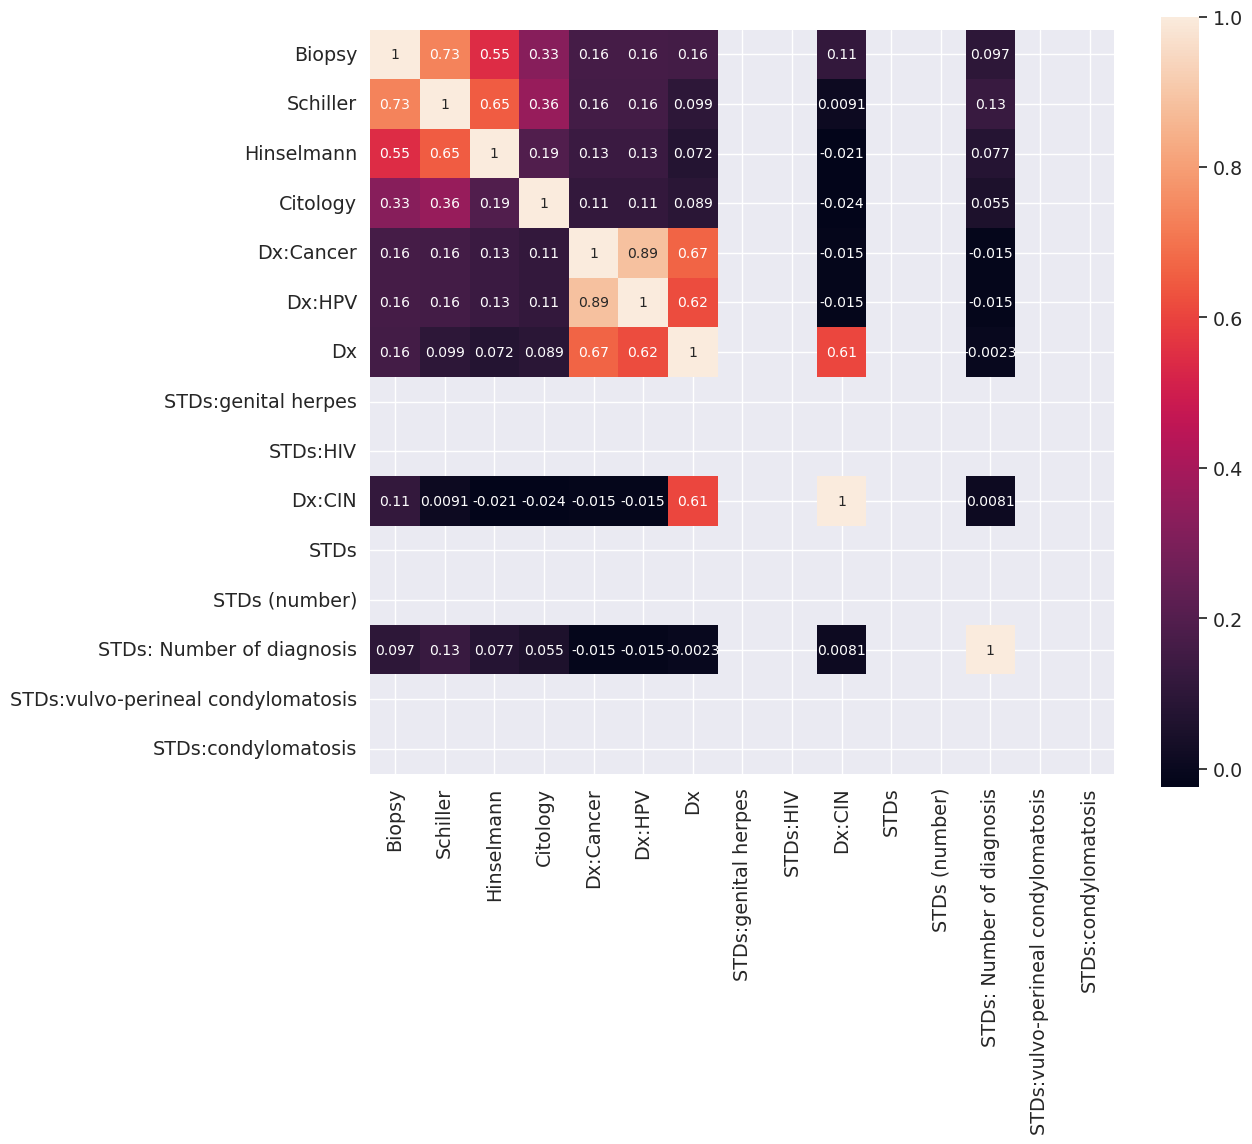

In [87]:
# list the heatmap of top correlation

corr = data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Step1 Cleaning Of Data**

**Data Preprocessing**

In [88]:
# Imputing the missing values from the given dataset
# we will impute the categorical variables with 0 or 1 and continuous variables with median value

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(
    data['Number of sexual partners'].median())
data['Number of sexual partners'].isnull().any()

# data['Number of sexual partners'].value_counts()

False

In [89]:
# Imputing the missing values from First sexual intercourse

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(
    data['First sexual intercourse'].median())
data['First sexual intercourse'].isnull().any()

# data['First sexual intercourse'].value_counts()

False

In [90]:
# Imputing the missing values from Num of pregnancies

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Num of pregnancies'].isnull().any()

# data['Num of pregnancies'].value_counts()

False

In [91]:
# Imputing the missing values from Smokes

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())
data['Smokes'].isnull().any()

# data['Smokes'].value_counts()

False

In [92]:
# Imputing the missing values from Smokes (years)

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

# data['Smokes (years)'].value_counts()

False

In [93]:
# Imputing the missing values from Smokes (years)

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

# data['Smokes (years)'].value_counts()

False

In [94]:
# Imputing the missing values from Hormonal Contraceptives

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(
    data['Hormonal Contraceptives'].median())
data['Hormonal Contraceptives'].isnull().any()

# data['Hormonal Contraceptives'].value_counts()

False

In [95]:
# Imputing the missing values from Hormonal Contraceptives (years)

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(
    data['Hormonal Contraceptives (years)'].median())
data['Hormonal Contraceptives (years)'].isnull().any()

# data['Hormonal Contraceptives (years)'].value_counts()

False

In [96]:
# Imputing the missing values from IUD

data['IUD'] = data['IUD'].fillna(0)
data['IUD'].isnull().any()

# data['IUD'].value_counts()

False

In [97]:
# Imputing the missing values from IUD (years)

data['IUD (years)'] = data['IUD (years)'].fillna(0)
data['IUD (years)'].isnull().any()

# data['IUD (years)'].value_counts()

False

In [98]:
# Imputing the missing values from STDs

data['STDs'] = data['STDs'].fillna(1)
data['STDs'].isnull().any()

# data['STDs'].value_counts()

False

In [99]:
# Imputing the missing values from STDs (number)

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs (number)'].isnull().any()

# data['STDs (number)'].value_counts()

False

In [100]:
# Imputing the missing values from STDs:condylomatosis

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(
    data['STDs:condylomatosis'].median())
data['STDs:condylomatosis'].isnull().any()

# data['STDs:condylomatosis'].value_counts()

False

In [101]:
# Imputing the missing values from STDs:cervical condylomatosis

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(
    data['STDs:cervical condylomatosis'].median())
data['STDs:cervical condylomatosis'].isnull().any()

# data['STDs:cervical condylomatosis'].value_counts()

False

In [102]:
# Imputing the missing values from STDs:vaginal condylomatosis

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(
    data['STDs:vaginal condylomatosis'].median())
data['STDs:vaginal condylomatosis'].isnull().any()

# data['STDs:vaginal condylomatosis'].value_counts()

False

In [103]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(
    data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'].isnull().any()

# data['STDs:vulvo-perineal condylomatosis'].value_counts()

False

In [104]:
# Imputing the missing values from STDs:syphilis

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:syphilis'].isnull().any()

# data['STDs:syphilis'].value_counts()

False

In [105]:
# Imputing the missing values from STDs:pelvic inflammatory diseases

data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(
    data['STDs:pelvic inflammatory disease'].median())
data['STDs:pelvic inflammatory disease'].isnull().any()

# data['STDs:pelvic inflammatory disease'].value_counts()

False

In [106]:
# Imputing the missing values from STDs:genital herpes

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(
    data['STDs:genital herpes'].median())
data['STDs:genital herpes'].isnull().any()

# data['STDs:genital herpes'].value_counts()

False

In [107]:
# Imputing the missing values from STDs:molluscum contagiosum

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(
    data['STDs:molluscum contagiosum'].median())
data['STDs:molluscum contagiosum'].isnull().any()

# data['STDs:molluscum contagiosum'].value_counts()

False

In [108]:
# Imputing the missing values from STDs:AIDS

data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:AIDS'].isnull().any()

# data['STDs:AIDS'].value_counts()

False

In [109]:
# Imputing the missing values from STDs:HIV

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:HIV'].isnull().any()

# data['STDs:HIV'].value_counts()

False

In [110]:
# Imputing the missing values from STDs:Hepatitis B

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:Hepatitis B'].isnull().any()

# data['STDs:Hepatitis B'].value_counts()

False

In [111]:
# Imputing the missing values from STDs:HPV

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs:HPV'].isnull().any()

# data['STDs:HPV'].value_counts()

False

In [112]:
# Imputing the missing values from STDs: Time since first diagnosis

data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(
    data['STDs: Time since first diagnosis'].median())
data['STDs: Time since first diagnosis'].isnull().any()

# data['STDs: Time since first diagnosis'].value_counts()

False

In [113]:
# Imputing the missing values from STDs: Time since last diagnosis

data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(
    data['STDs: Time since last diagnosis'].median())
data['STDs: Time since last diagnosis'].isnull().any()

# data['STDs: Time since last diagnosis'].value_counts()

False

In [114]:
# Imputing values for categorical variables
# Onlyb those columns are utilised which related to cervical cancer analysis
# Correct the columns list based on the actual column names
correct_columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
                   'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
                   'Hinselmann', 'Cytology', 'Schiller']  # 'Citology' corrected to 'Cytology'

# Ensure all columns exist before applying get_dummies
existing_columns = [col for col in correct_columns if col in data.columns]

# Apply one-hot encoding to the existing categorical columns
data = pd.get_dummies(data=data, columns=existing_columns)

# Check for any remaining missing values
print(data.isnull().sum())


Age                                    0
Number of sexual partners              0
First sexual intercourse               0
Num of pregnancies                     0
Smokes (years)                         0
Smokes (packs/year)                   13
Hormonal Contraceptives (years)        0
IUD (years)                            0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV                               0
STDs: Number of diagnosis              0
STDs: Time since first diagnosis       0
STDs: Time since last diagnosis        0
Citology        

In [115]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,845.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.216392,0.453144,2.035331,0.444604,0.155012,0.051282,...,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,4.057974,2.226610,3.567040,1.814218,0.529617,0.220701,...,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000


**Step 2 Implementation of data, visualizing and comparing columns** 

**Data Visualization**

<Axes: xlabel='STDs (number)', ylabel='count'>

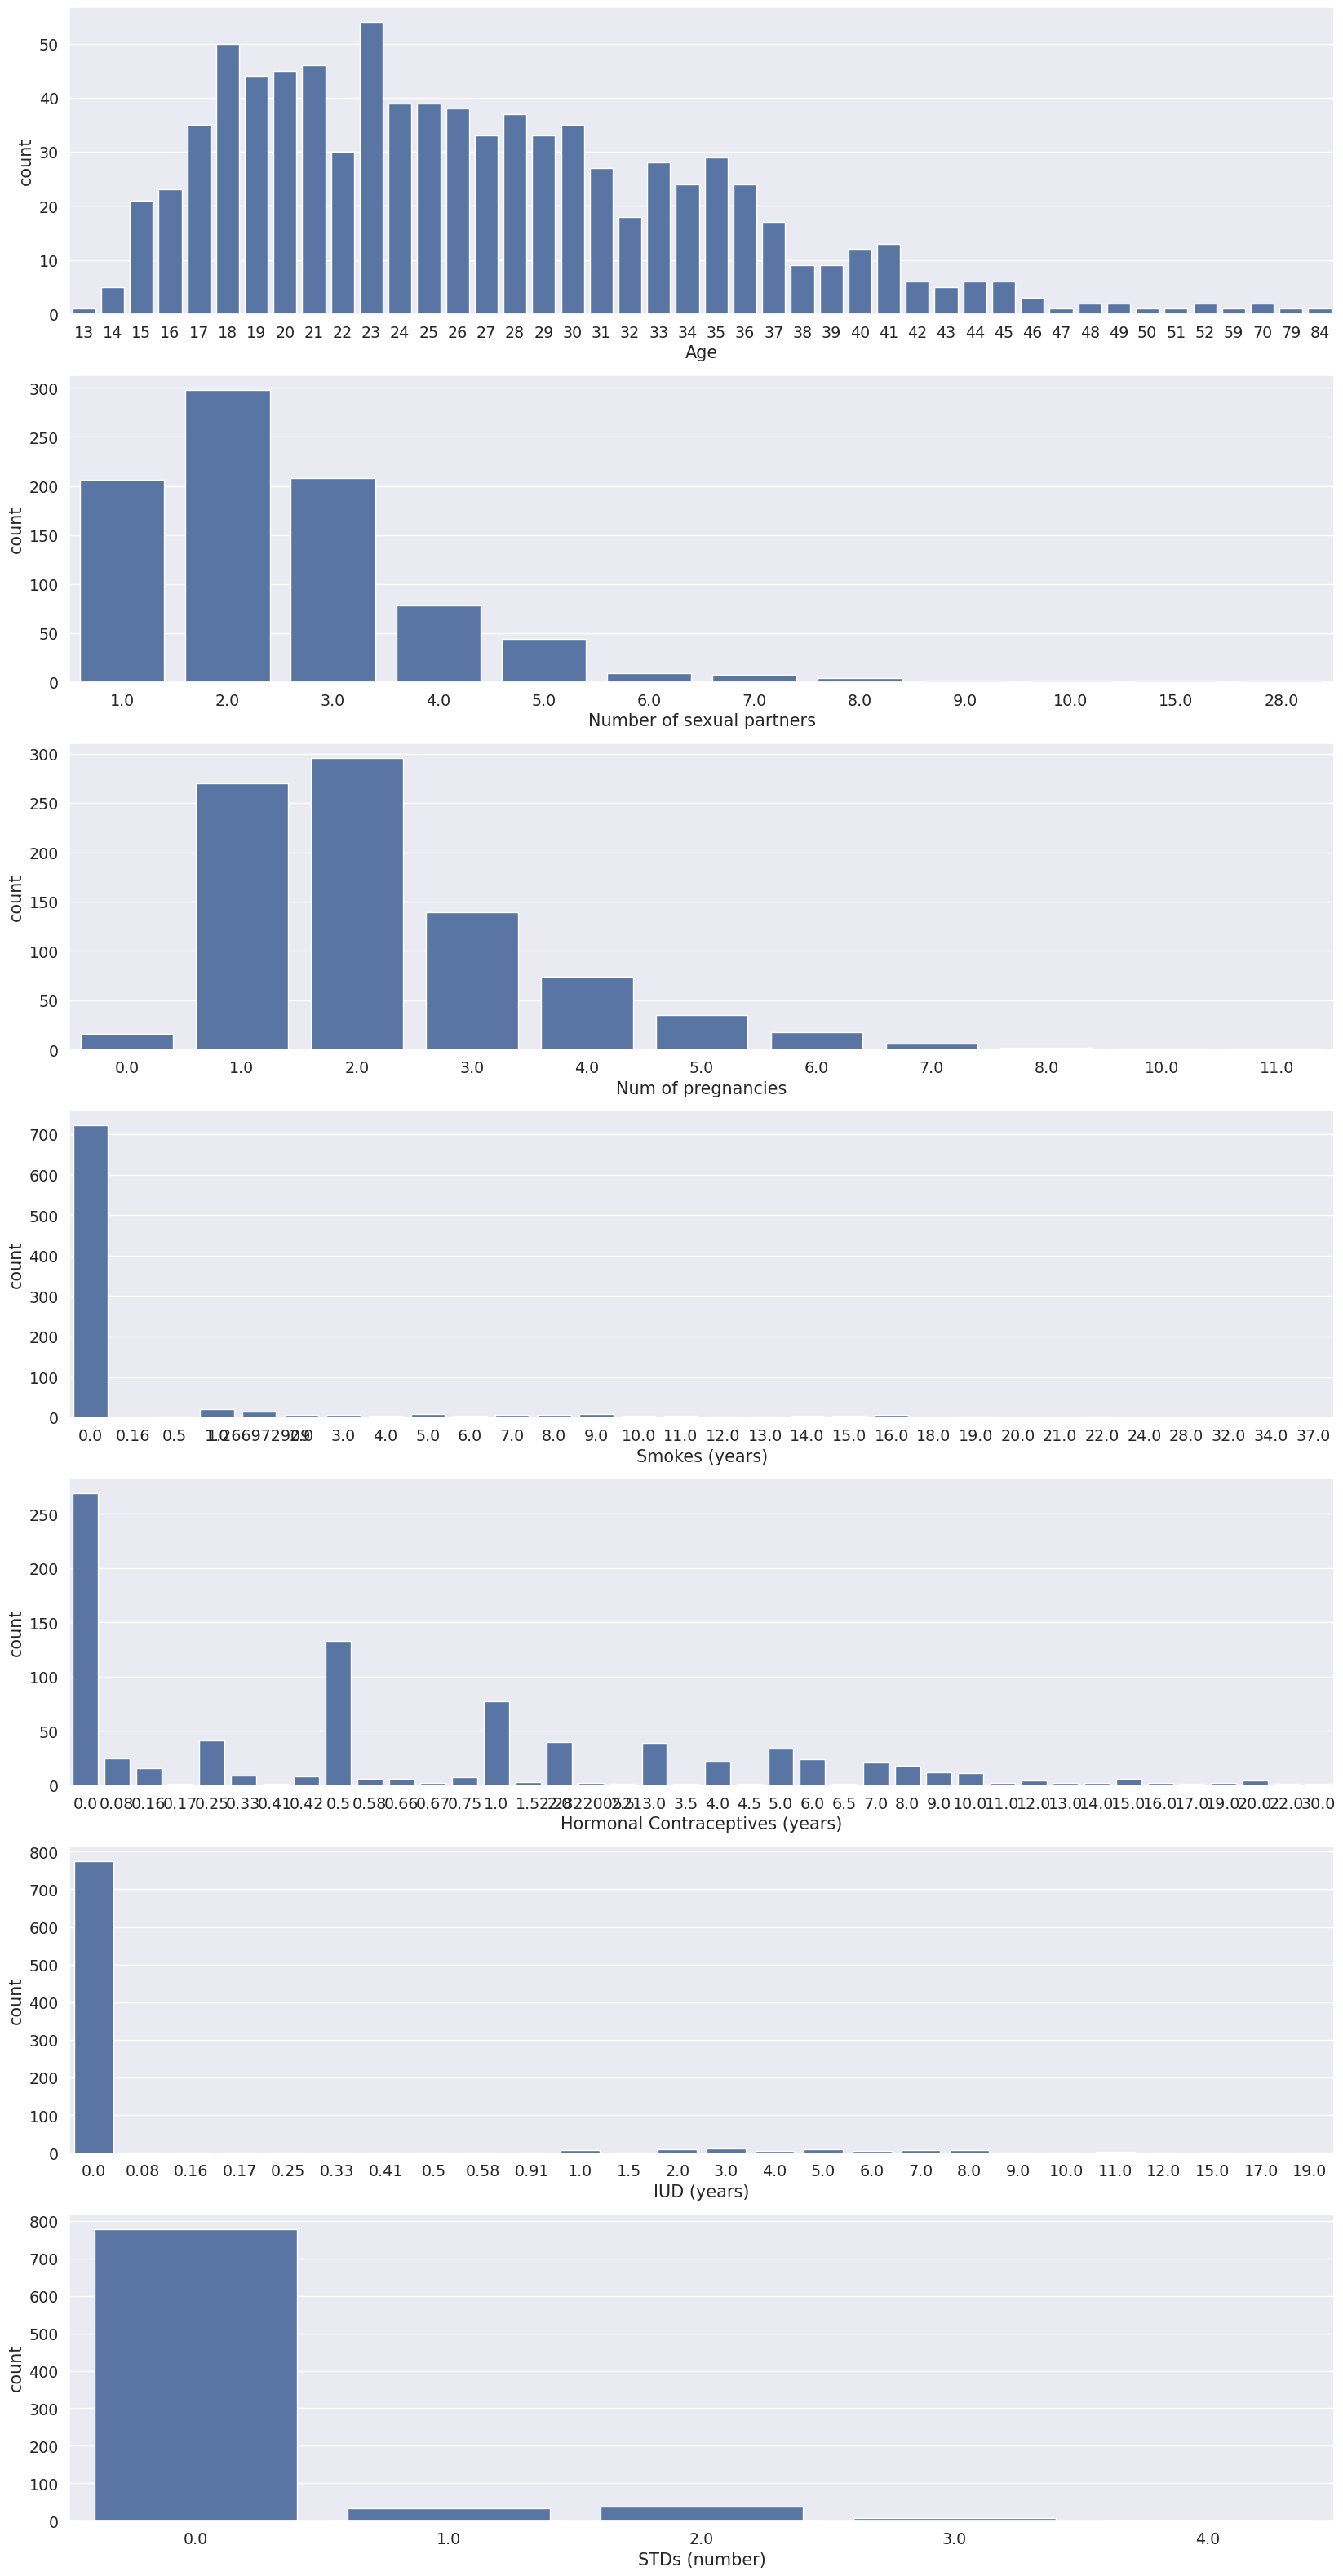

In [116]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(20, 40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)

In [117]:
# ensure y is correctly set to the last column, assuming it should be the last column in the dataset
x = data.iloc[:, :-1]  # all columns except the last one
y = data.iloc[:, -1]  # last column

print(x.shape)
print(y.shape)

(858, 45)
(858,)


In [118]:
# splitting the dataset into  training and test set

from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' are your feature and target arrays or DataFrames
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(514, 45)
(514,)
(344, 45)
(344,)


In [119]:
# MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

# creating a minmax scaler
mm = MinMaxScaler()

# feeding the independent data into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

**Model Implementation**

**Logistic Regression**

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the target variable (y) and features (X)
target = 'Biopsy'
X = data.drop(columns=[target])
y = data[target]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

noise_factor = 0.1  # Adjust this value to control the amount of noise
X_noisy = X_imputed + noise_factor * np.random.normal(size=X_imputed.shape)

# Split the data into training and testing sets (60% train, 40% test) with a new random seed
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.4, random_state=45)

# Print the shapes of the training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_matrix_output)


(514, 45)
(514,)
(344, 45)
(344,)
Accuracy: 0.936046511627907
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       320
           1       0.57      0.33      0.42        24

    accuracy                           0.94       344
   macro avg       0.76      0.66      0.69       344
weighted avg       0.92      0.94      0.93       344

Confusion Matrix:
[[314   6]
 [ 16   8]]


<Figure size 1000x700 with 0 Axes>

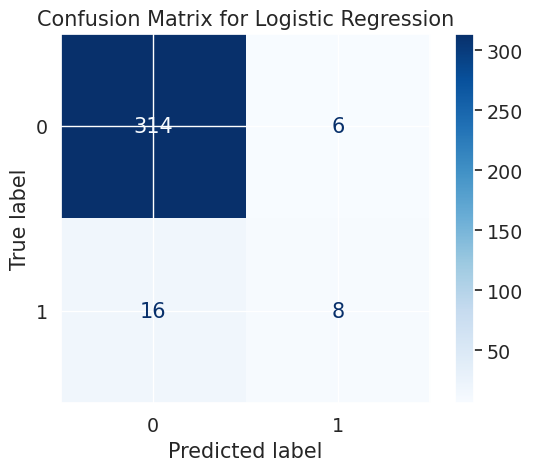

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix for Logistic Regression
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
cmd_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd_lr.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [122]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Output results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_report_rf)
print("Confusion Matrix:")
print(confusion_matrix_rf)


Random Forest Results:
Accuracy: 0.9273255813953488
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       320
           1       0.46      0.25      0.32        24

    accuracy                           0.93       344
   macro avg       0.70      0.61      0.64       344
weighted avg       0.91      0.93      0.92       344

Confusion Matrix:
[[313   7]
 [ 18   6]]


<Figure size 1000x700 with 0 Axes>

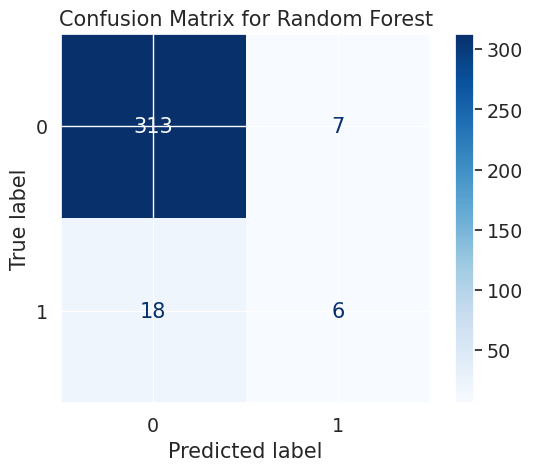

In [123]:
# Generate confusion matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
cmd_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf,
                                display_labels=rf_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd_rf.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


**Decision Tree**

In [124]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Output results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt}")
print("Classification Report:")
print(classification_report_dt)
print("Confusion Matrix:")
print(confusion_matrix_dt)


Decision Tree Results:
Accuracy: 0.9418604651162791
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       320
           1       0.57      0.71      0.63        24

    accuracy                           0.94       344
   macro avg       0.77      0.83      0.80       344
weighted avg       0.95      0.94      0.94       344

Confusion Matrix:
[[307  13]
 [  7  17]]


<Figure size 1000x700 with 0 Axes>

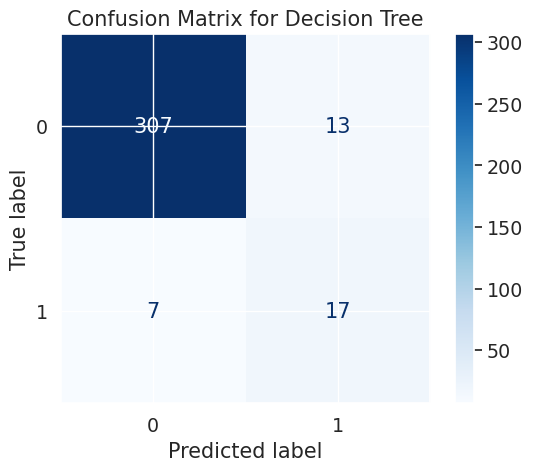

In [125]:
# Generate confusion matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cmd_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt,
                                display_labels=dt_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd_dt.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


**Support Vector Machine**

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm, zero_division=1)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Output results
print("SVM Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(classification_report_svm)
print("Confusion Matrix:")
print(confusion_matrix_svm)


SVM Results:
Accuracy: 0.9302325581395349
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       320
           1       1.00      0.00      0.00        24

    accuracy                           0.93       344
   macro avg       0.97      0.50      0.48       344
weighted avg       0.94      0.93      0.90       344

Confusion Matrix:
[[320   0]
 [ 24   0]]


<Figure size 1000x700 with 0 Axes>

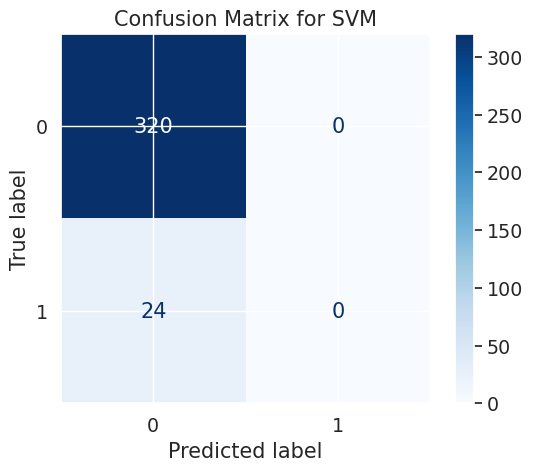

In [127]:
# Generate confusion matrix for SVM
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
cmd_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm,
                                 display_labels=svm_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd_svm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for SVM')
plt.show()


**KNN**

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn, zero_division=1)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Output results
print("KNN Results:")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_report_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)


KNN Results:
Accuracy: 0.9302325581395349
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       320
           1       1.00      0.00      0.00        24

    accuracy                           0.93       344
   macro avg       0.97      0.50      0.48       344
weighted avg       0.94      0.93      0.90       344

Confusion Matrix:
[[320   0]
 [ 24   0]]


<Figure size 1000x700 with 0 Axes>

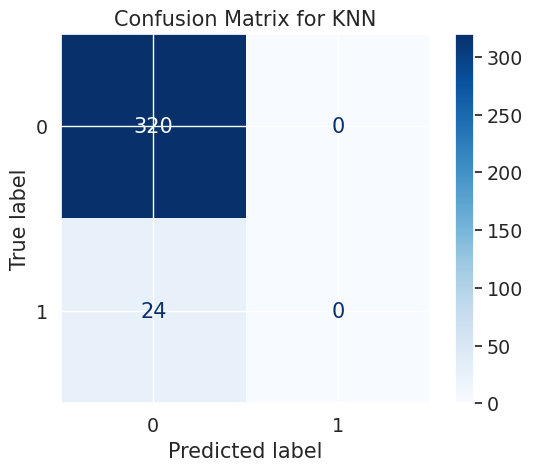

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate confusion matrix for KNN
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
cmd_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn,
                                 display_labels=knn_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd_knn.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for KNN')
plt.show()


**Classifier**

**Light BGM Classifier**

[LightGBM] [Info] Number of positive: 31, number of negative: 483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7728
[LightGBM] [Info] Number of data points in the train set: 514, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.060311 -> initscore=-2.746029
[LightGBM] [Info] Start training from score -2.746029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

<Figure size 1000x700 with 0 Axes>

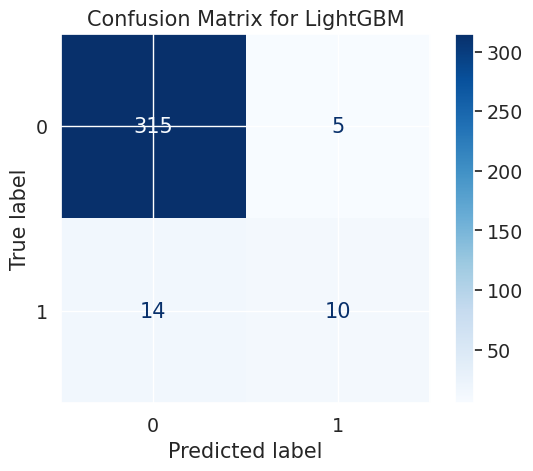

In [133]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, \
  ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Create default numeric feature names
def rename_features(df):
  df.columns = [f'feature_{i}' for i in range(df.shape[1])]
  return df


# Rename features in training and test data
X_train = rename_features(X_train)
X_test = rename_features(X_test)

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predict on the test set
print(f"{X_test.columns = }")
y_pred_lgb = lgb_model.predict(X_test)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
classification_report_lgb = classification_report(y_test, y_pred_lgb)
confusion_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

# Output results
print("LightGBM Results:")
print(f"Accuracy: {accuracy_lgb}")
print("Classification Report:")
print(classification_report_lgb)
print("Confusion Matrix:")
print(confusion_matrix_lgb)

# Plot Confusion Matrix
cmd_lgb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lgb,
                                 display_labels=lgb_model.classes_)

plt.figure(figsize=(10, 7))
cmd_lgb.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for LightGBM')
plt.show()


In [131]:
data.shape

(858, 46)